Import Libraries

In [1]:
import pandas as pd
import regex
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder # Encoding with categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer # Filling in null values for numeric data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


In [3]:
train_df.head()

,customer_id,firstname,lastname,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,...,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency,primary_close_flag,final_close_flag
0,4814dfa2-45a8-46b9-8102-98ecbbec2d2a,Navya,Vasa,7,10,8,12,10,13,5,...,0.0,1.0,3.0,4.0,1,3,4,1,0,0
1,bb0abe41-cc89-4a1d-bb1c-48bd212ae00d,Azad,Warrior,5,15,6,7,6,9,1,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0
2,edfd1a62-05da-4cfd-b8ae-521f05f0fd5f,Piya,Jha,1,15,17,8,5,9,1,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0
3,3eaa4c2a-2316-48f4-b1b0-4aafe2286630,Rhea,Varma,11,7,2,11,13,14,8,...,3.0,3.0,3.0,4.0,1,2,4,1,0,0
4,c9a73239-baae-40eb-8855-dab07767ea86,Sahil,Dave,12,14,9,8,11,6,13,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0


In [4]:
test_df.head()

,customer_id,firstname,lastname,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,...,encoded_payment_19,encoded_payment_20,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency
0,1dffd171-010b-4773-894f-4095077b0e31,Aradhya,Deep,14,2,13,14,2,14,6,...,3.0,4.0,3.0,3.0,3.0,NaN,1,3,4,1
1,cf0e7f8c-b22b-410c-8ad6-4a5bfd4d11cf,Anahita,Anand,17,3,6,0,1,0,4,...,0.0,1.0,0.0,0.0,0.0,1.0,1,2,3,1
2,49c9f6ef-58f2-4334-bb44-9a4ded2e587f,Amani,Tak,14,9,10,14,7,10,4,...,3.0,4.0,3.0,3.0,3.0,4.0,1,2,4,1
3,daab9520-7716-4b1e-b791-907912a81f79,Tushar,Sodhi,7,14,4,12,11,6,13,...,3.0,4.0,3.0,3.0,3.0,4.0,1,3,4,1
4,9d4adc34-368e-4642-98a2-58d73b4294f7,Jivika,Rana,13,3,3,16,1,15,4,...,3.0,4.0,3.0,3.0,3.0,4.0,1,3,3,1


DataPreprocessing and EDA

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 62 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   customer_id                         1106674 non-null  object 
 1   firstname                           1106674 non-null  object 
 2   lastname                            1106674 non-null  object 
 3   record_number                       1106674 non-null  int64  
 4   days_since_opened                   1106674 non-null  int64  
 5   days_since_confirmed                1106674 non-null  int64  
 6   primary_term                        1106674 non-null  int64  
 7   final_term                          1106674 non-null  int64  
 8   days_till_primary_close             1106674 non-null  int64  
 9   days_till_final_close               1106674 non-null  int64  
 10  loans_credit_limit                  1106674 non-null  int64  
 11  loans_next_

In [6]:
train_df['final_close_flag'].unique()

array([0, 1], dtype=int64)

In [7]:
train_df.columns

Index(['customer_id', 'firstname', 'lastname', 'record_number',
       'days_since_opened', 'days_since_confirmed', 'primary_term',
       'final_term', 'days_till_primary_close', 'days_till_final_close',
       'loans_credit_limit', 'loans_next_payment_summary',
       'loans_outstanding_balance', 'loans_max_overdue_amount',
       'loans_credit_cost_rate', 'loans_within_5_days',
       'loans_within_5_to_30_days', 'loans_within_30_to_60_days',
       'loans_within_60_to_90_days', 'loans_over_90_days',
       'is_zero_loans_within_5_days', 'is_zero_loans_within_5_to_30_days',
       'is_zero_loans_within_30_to_60_days',
       'is_zero_loans_within_60_to_90_days', 'is_zero_loans_over_90_days',
       'utilization', 'over_limit_count', 'max_over_limit_count',
       'is_zero_utilization', 'is_zero_over_limit_count',
       'is_zero_max_over_limit_count', 'encoded_payment_0',
       'encoded_payment_1', 'encoded_payment_2', 'encoded_payment_3',
       'encoded_payment_4', 'encoded_payme

In [8]:
train_df.shape

(1106674, 62)

In [9]:
#to check and print the total null in the all columns
pd.set_option('display.max_rows', None)
print(train_df.isnull().sum())

customer_id                               0
firstname                                 0
lastname                                  0
record_number                             0
days_since_opened                         0
days_since_confirmed                      0
primary_term                              0
final_term                                0
days_till_primary_close                   0
days_till_final_close                     0
loans_credit_limit                        0
loans_next_payment_summary                0
loans_outstanding_balance                 0
loans_max_overdue_amount                  0
loans_credit_cost_rate                    0
loans_within_5_days                       0
loans_within_5_to_30_days                 0
loans_within_30_to_60_days                0
loans_within_60_to_90_days                0
loans_over_90_days                        0
is_zero_loans_within_5_days               0
is_zero_loans_within_5_to_30_days         0
is_zero_loans_within_30_to_60_da

In [10]:
#unnecessary data in the training dataset
column_to_delete = ['customer_id', 'firstname', 'lastname']
train_df.drop(columns=column_to_delete, inplace=True)
test_df.drop(columns=column_to_delete, inplace=True)

In [11]:
#To checkout the object columns
obj_columns = set(train_df.select_dtypes(include=['object']).columns)
print(obj_columns)

{'is_zero_max_over_limit_count', 'is_zero_loans_within_5_days', 'is_zero_loans_within_30_to_60_days', 'is_zero_loans_within_5_to_30_days', 'is_zero_loans_within_60_to_90_days', 'is_zero_utilization', 'is_zero_loans_over_90_days', 'is_zero_over_limit_count'}


In [12]:
#To checkout the object columns
obj_columns_test = set(test_df.select_dtypes(include=['object']).columns)
print(obj_columns_test)

{'is_zero_max_over_limit_count', 'is_zero_loans_within_5_days', 'is_zero_loans_within_30_to_60_days', 'is_zero_loans_within_5_to_30_days', 'is_zero_loans_within_60_to_90_days', 'is_zero_utilization', 'is_zero_loans_over_90_days', 'is_zero_over_limit_count'}


Conversion of Data by LabelEncoding

In [13]:
#create a LabelEncoder instance 
le = LabelEncoder()

for cols in obj_columns:
    train_df[cols] = le.fit_transform(train_df[cols])

In [14]:
#create a LabelEncoder instance 
le = LabelEncoder()

for cols in obj_columns_test:
    test_df[cols] = le.fit_transform(test_df[cols])

In [15]:
train_df.fillna(train_df.mean(), inplace=True)

In [16]:
train_df.isnull().sum()

record_number                         0
days_since_opened                     0
days_since_confirmed                  0
primary_term                          0
final_term                            0
days_till_primary_close               0
days_till_final_close                 0
loans_credit_limit                    0
loans_next_payment_summary            0
loans_outstanding_balance             0
loans_max_overdue_amount              0
loans_credit_cost_rate                0
loans_within_5_days                   0
loans_within_5_to_30_days             0
loans_within_30_to_60_days            0
loans_within_60_to_90_days            0
loans_over_90_days                    0
is_zero_loans_within_5_days           0
is_zero_loans_within_5_to_30_days     0
is_zero_loans_within_30_to_60_days    0
is_zero_loans_within_60_to_90_days    0
is_zero_loans_over_90_days            0
utilization                           0
over_limit_count                      0
max_over_limit_count                  0


In [17]:
data_types = train_df.dtypes
# Check unique values
unique_values = train_df.nunique()

# Identify potential categorical variables with only two unique values (1 and 0)
potential_categorical = unique_values[unique_values == 2].index

# Print the data type and unique values for these potential categorical variables
for col in potential_categorical:
    print(f"Column '{col}':")
    print(f"Data Type: {data_types[col]}")
    print(f"Unique Values: {train_df[col].unique()}")
    print()


Column 'loans_within_60_to_90_days':
Data Type: int64
Unique Values: [4 1]

Column 'is_zero_loans_within_5_days':
Data Type: int32
Unique Values: [1 0]

Column 'is_zero_loans_within_5_to_30_days':
Data Type: int32
Unique Values: [0 1]

Column 'is_zero_loans_within_30_to_60_days':
Data Type: int32
Unique Values: [1 0]

Column 'is_zero_loans_within_60_to_90_days':
Data Type: int32
Unique Values: [1 0]

Column 'is_zero_loans_over_90_days':
Data Type: int32
Unique Values: [1 0]

Column 'is_zero_utilization':
Data Type: int32
Unique Values: [1 0]

Column 'is_zero_over_limit_count':
Data Type: int32
Unique Values: [1 0]

Column 'is_zero_max_over_limit_count':
Data Type: int32
Unique Values: [1 0]

Column 'primary_close_flag':
Data Type: int64
Unique Values: [0 1]

Column 'final_close_flag':
Data Type: int64
Unique Values: [0 1]



In [18]:
#encoded columns wont gonna effect a dataset as these dataset is already encoded in this form
encoded_columns = [f'encoded_payment_{i}' for i in range(0, 25)]
print(encoded_columns)


['encoded_payment_0', 'encoded_payment_1', 'encoded_payment_2', 'encoded_payment_3', 'encoded_payment_4', 'encoded_payment_5', 'encoded_payment_6', 'encoded_payment_7', 'encoded_payment_8', 'encoded_payment_9', 'encoded_payment_10', 'encoded_payment_11', 'encoded_payment_12', 'encoded_payment_13', 'encoded_payment_14', 'encoded_payment_15', 'encoded_payment_16', 'encoded_payment_17', 'encoded_payment_18', 'encoded_payment_19', 'encoded_payment_20', 'encoded_payment_21', 'encoded_payment_22', 'encoded_payment_23', 'encoded_payment_24']


In [19]:
train_df.drop(columns=encoded_columns, inplace=True)
test_df.drop(columns=encoded_columns, inplace=True)

In [20]:
# count the number of zeros
column = train_df.columns
for i in column:
    count = (train_df[i] == 0).sum()
    print(i,'-', count)

record_number - 0
days_since_opened - 71558
days_since_confirmed - 48731
primary_term - 51318
final_term - 70137
days_till_primary_close - 47405
days_till_final_close - 57850
loans_credit_limit - 57925
loans_next_payment_summary - 51992
loans_outstanding_balance - 0
loans_max_overdue_amount - 0
loans_credit_cost_rate - 48100
loans_within_5_days - 3583
loans_within_5_to_30_days - 4745
loans_within_30_to_60_days - 0
loans_within_60_to_90_days - 0
loans_over_90_days - 0
is_zero_loans_within_5_days - 89420
is_zero_loans_within_5_to_30_days - 186368
is_zero_loans_within_30_to_60_days - 43157
is_zero_loans_within_60_to_90_days - 23819
is_zero_loans_over_90_days - 22500
utilization - 8641
over_limit_count - 45
max_over_limit_count - 6865
is_zero_utilization - 280613
is_zero_over_limit_count - 78594
is_zero_max_over_limit_count - 157867
encoded_loans_account_holder_type - 3
encoded_loans_credit_status - 94
encoded_loans_credit_type - 25508
encoded_loans_account_currency - 278
primary_close_fla

In [21]:
train_df.describe()

,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,loans_credit_limit,loans_next_payment_summary,loans_outstanding_balance,...,max_over_limit_count,is_zero_utilization,is_zero_over_limit_count,is_zero_max_over_limit_count,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency,primary_close_flag,final_close_flag
count,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,...,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06
mean,9.149727e+00,9.433967e+00,8.231377e+00,8.408147e+00,8.282763e+00,7.273099e+00,8.193988e+00,9.715922e+00,2.332612e+00,2.993031e+00,...,1.567052e+01,7.464357e-01,9.289818e-01,8.573500e-01,1.029407e+00,2.758336e+00,3.599215e+00,1.001480e+00,1.282708e-01,1.910454e-01
std,5.746106e+00,5.747728e+00,4.776280e+00,5.282007e+00,4.565543e+00,5.094787e+00,4.321941e+00,5.844795e+00,1.247430e+00,6.411320e-01,...,4.001749e+00,4.350513e-01,2.568554e-01,3.497157e-01,2.931483e-01,4.686307e-01,1.011067e+00,4.470347e-02,3.343913e-01,3.931249e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,2.000000e+00,5.000000e+00,5.000000e+00,2.000000e+00,3.000000e+00,...,1.700000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,9.000000e+00,1.000000e+01,9.000000e+00,8.000000e+00,8.000000e+00,7.000000e+00,9.000000e+00,1.000000e+01,2.000000e+00,3.000000e+00,...,1.700000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.300000e+01,1.400000e+01,1.200000e+01,1.400000e+01,1.200000e+01,1.200000e+01,1.100000e+01,1.500000e+01,2.000000e+00,3.000000e+00,...,1.700000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,4.700000e+01,1.900000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.500000e+01,1.900000e+01,6.000000e+00,5.000000e+00,...,1.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00


Distribution of data on Train and Test data

In [22]:
train_df.shape

(1106674, 34)

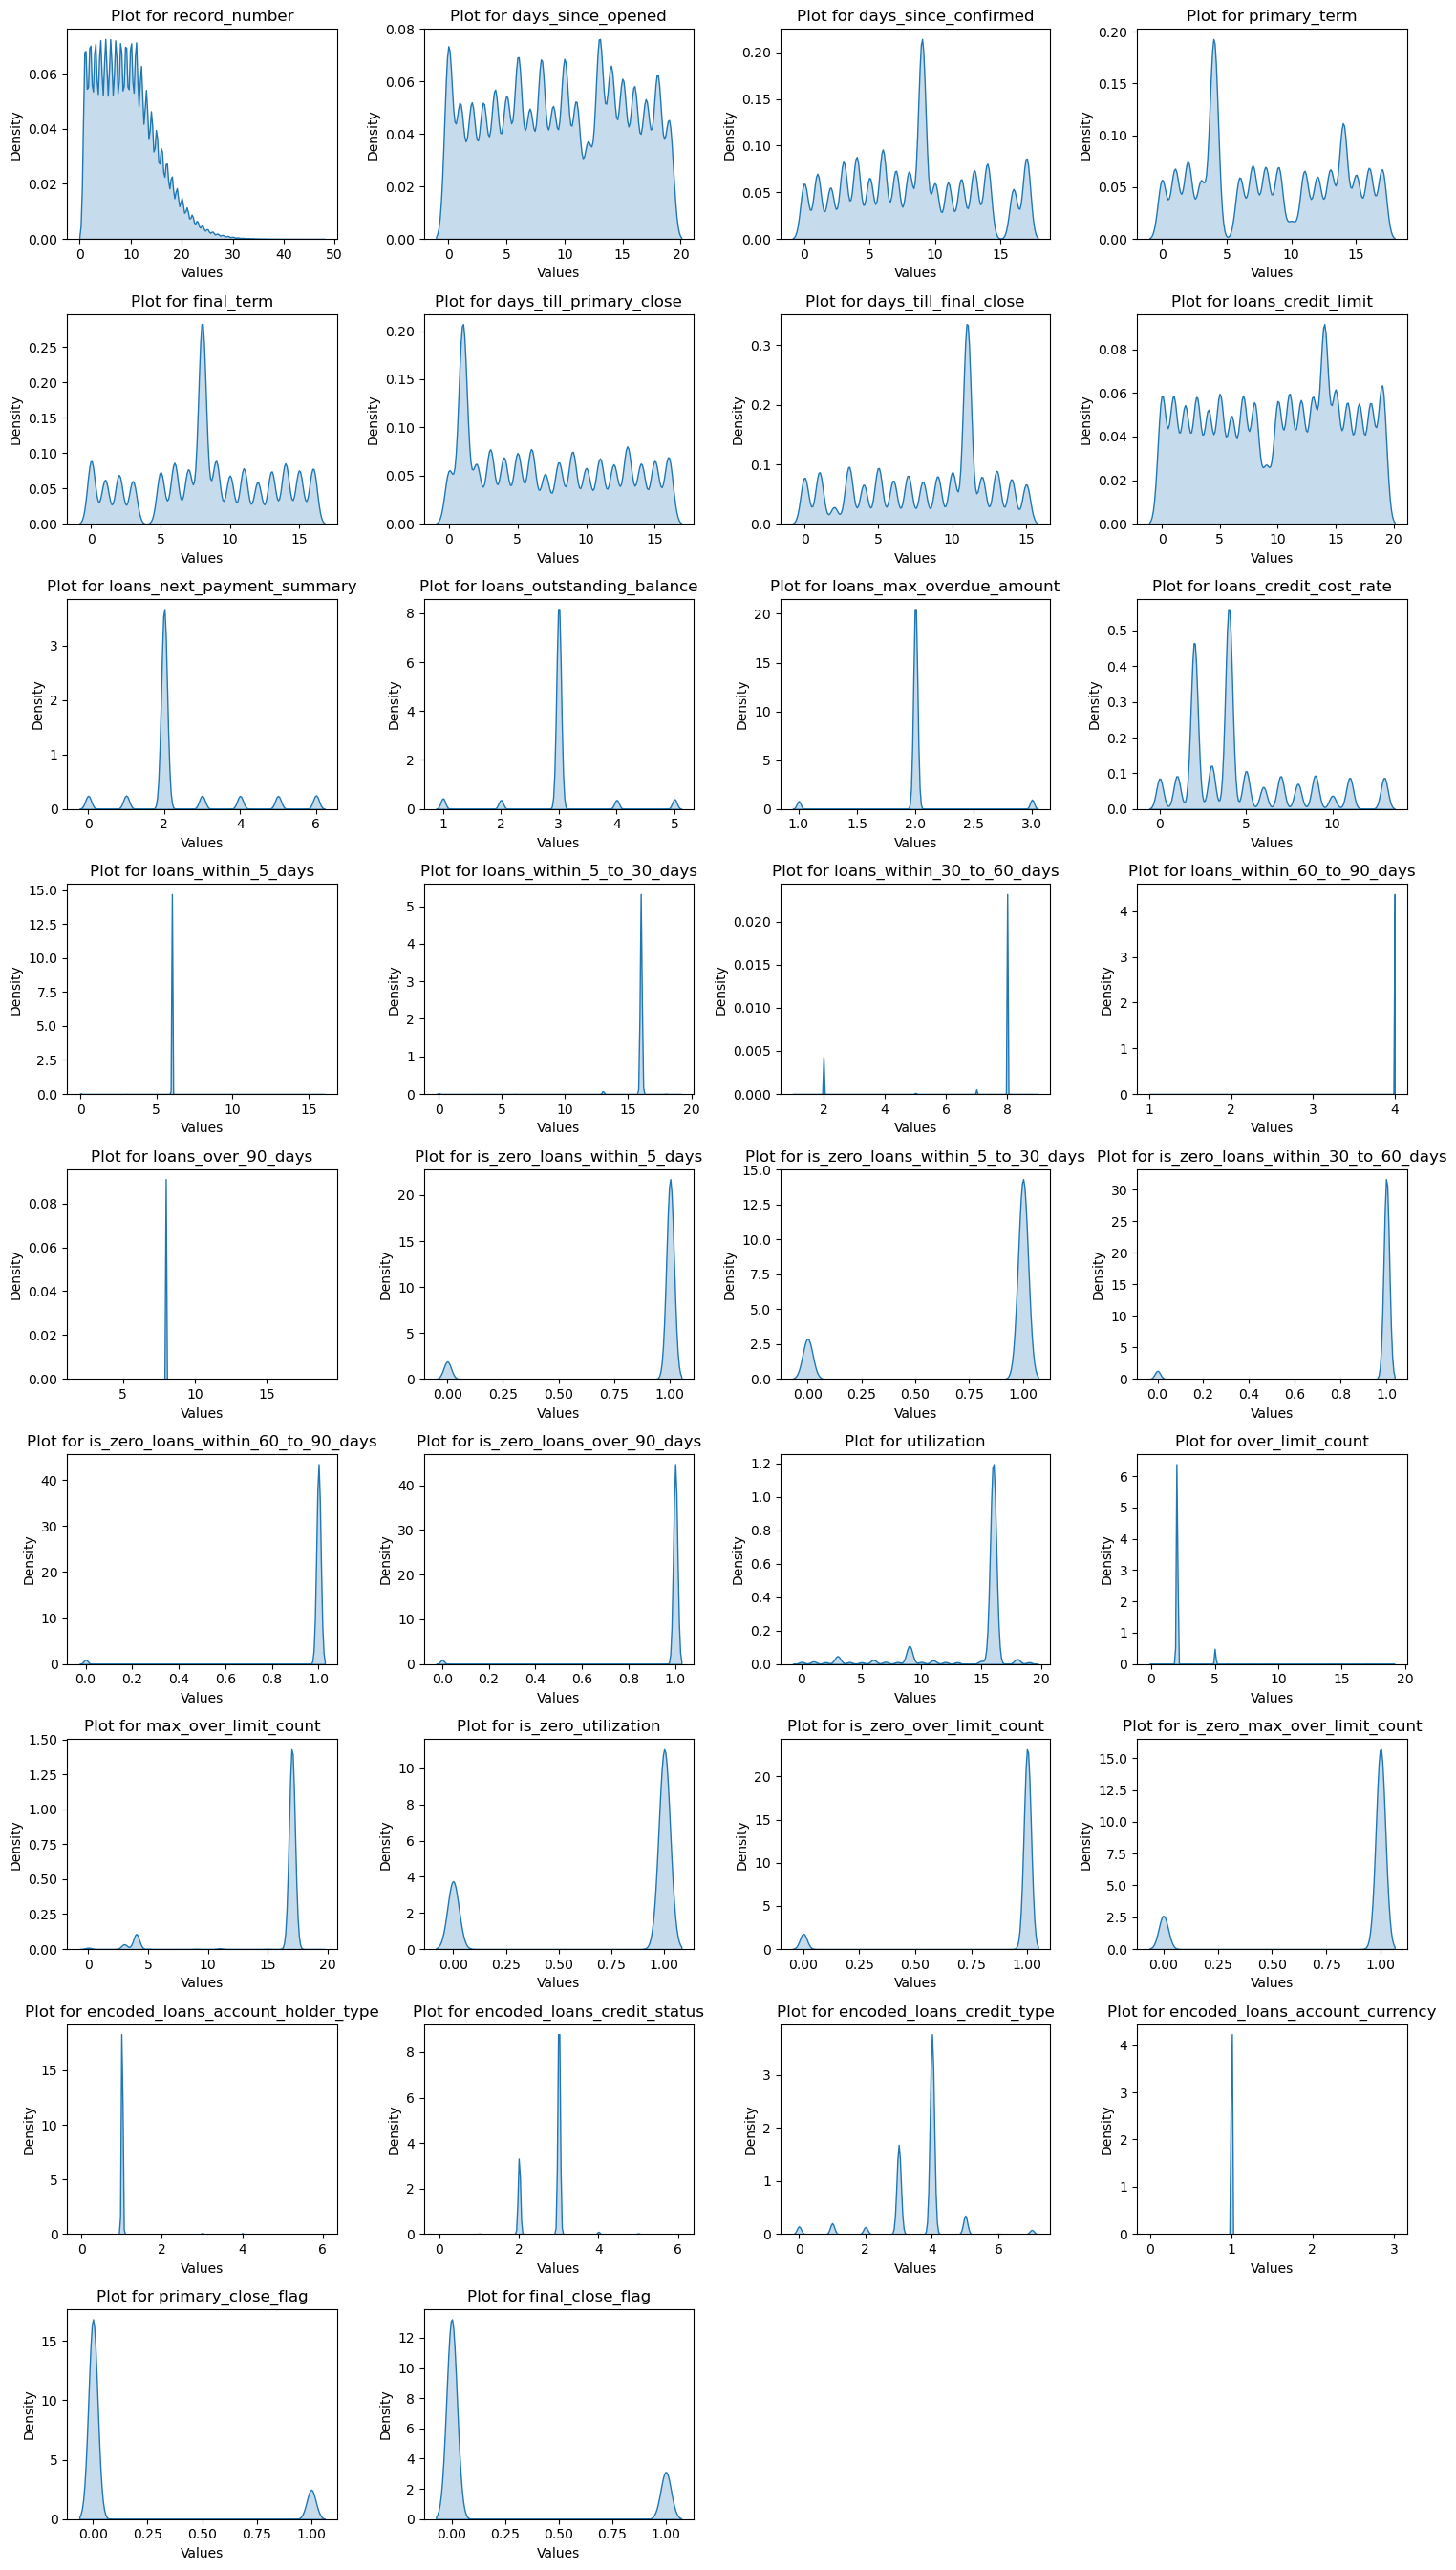

In [23]:
# Define the number of columns per row
columns_per_row = 4

# Calculate the number of rows needed
num_columns = len(train_df.columns)
num_rows = (num_columns + columns_per_row - 1) // columns_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 3 * num_rows))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Loop through the columns and create KDE plots
for i, col in enumerate(train_df.columns):
    row_idx = i // columns_per_row
    col_idx = i % columns_per_row
    ax = axes[row_idx, col_idx]
    
    sns.kdeplot(train_df[col], fill=True, ax=ax)
    ax.set_title(f'Plot for {col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Density')

# Remove any empty subplots if the number of columns is not a multiple of columns_per_row
if num_columns % columns_per_row != 0:
    for i in range(num_columns, num_rows * columns_per_row):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


Train.csv outlier finding

In [24]:
train_df.nunique()

record_number                         46
days_since_opened                     20
days_since_confirmed                  18
primary_term                          18
final_term                            17
days_till_primary_close               17
days_till_final_close                 16
loans_credit_limit                    20
loans_next_payment_summary             7
loans_outstanding_balance              5
loans_max_overdue_amount               3
loans_credit_cost_rate                14
loans_within_5_days                    9
loans_within_5_to_30_days             16
loans_within_30_to_60_days             6
loans_within_60_to_90_days             2
loans_over_90_days                     6
is_zero_loans_within_5_days            2
is_zero_loans_within_5_to_30_days      2
is_zero_loans_within_30_to_60_days     2
is_zero_loans_within_60_to_90_days     2
is_zero_loans_over_90_days             2
utilization                           20
over_limit_count                      20
max_over_limit_c

In [25]:
unq_count = train_df.nunique()

In [26]:
# Separate columns with nunique of 2 and greater than 2
col_unq_2 = unq_count[unq_count == 2].index.tolist()
col_grt_2 = unq_count[unq_count > 2].index.tolist()

In [27]:
df_unq2 = train_df[col_unq_2]
df_unqgrt_2 = train_df[col_grt_2]

In [28]:
df_unqgrt_2.shape

(1106674, 23)

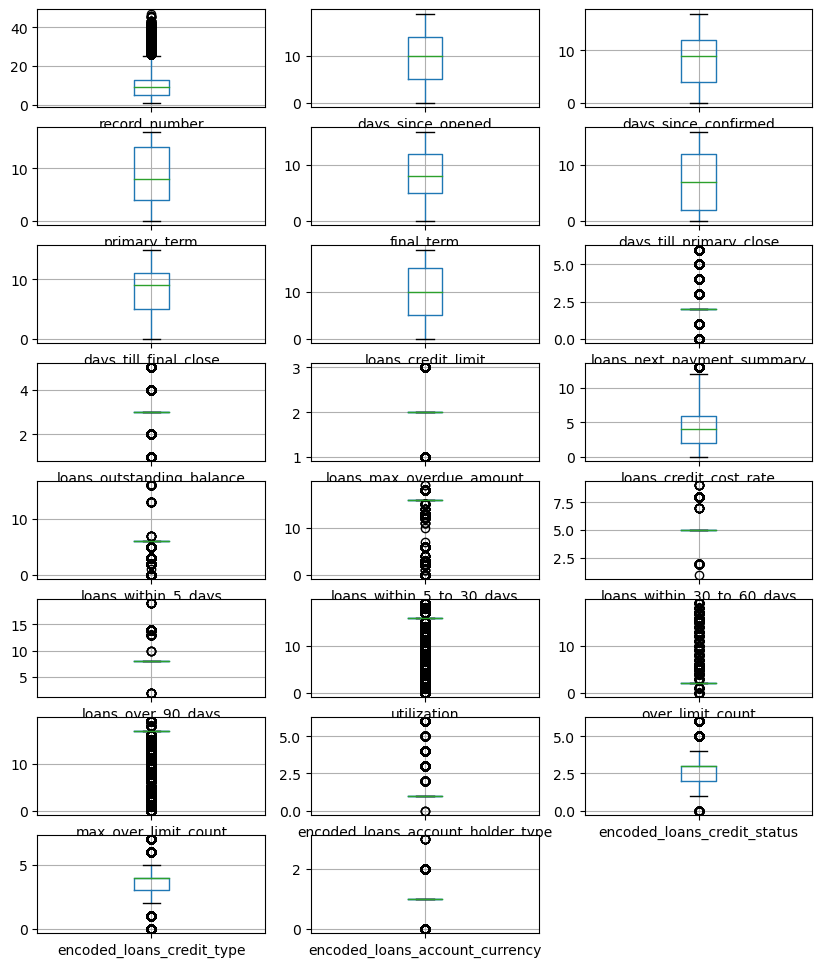

In [29]:
plt.figure(figsize=(10, 12))
i = 1
for col in df_unqgrt_2.columns:
    plt.subplot(8,3,i)
    df_unqgrt_2[[col]].boxplot()
    i+=1

In [30]:
df_unqgrt_2.skew()

record_number                         0.711505
days_since_opened                    -0.028561
days_since_confirmed                  0.118228
primary_term                          0.070191
final_term                           -0.126719
days_till_primary_close               0.183002
days_till_final_close                -0.385221
loans_credit_limit                   -0.082061
loans_next_payment_summary            1.429917
loans_outstanding_balance            -0.073100
loans_max_overdue_amount              0.236878
loans_credit_cost_rate                1.042567
loans_within_5_days                 -13.517164
loans_within_5_to_30_days           -11.749861
loans_within_30_to_60_days           33.424082
loans_over_90_days                   51.379370
utilization                          -1.982784
over_limit_count                      5.930528
max_over_limit_count                 -2.730005
encoded_loans_account_holder_type    11.103528
encoded_loans_credit_status          -0.606838
encoded_loans

In [31]:
copy2 = df_unqgrt_2.copy()

In [32]:
col_2 = copy2.columns

In [33]:
## For Train Data
for col in col_2:
    # Z-Score Method 
    up_limit = copy2[col].mean() + 3*copy2[col].std()
    lw_limit = copy2[col].mean() - 3*copy2[col].std()
    
    # IQR Method
    q1=copy2[col].quantile(0.25)
    q3=copy2[col].quantile(0.75)
    IQR=q3-q1
    up_boundry = q3+1.5*IQR
    lw_boundry = q1-1.5*IQR
    
    if (copy2[col].skew()<0.5) and (copy2[col].skew()>-0.5):
        print("Normal Data:",col)
        copy2[col]=np.where(copy2[col]>up_limit,up_limit,
                                np.where(copy2[col]<lw_limit, lw_limit,copy2[col]))
        
    elif (copy2[col].skew()>0.5) or (copy2[col].skew()<-0.5):
        print("Skewed data:",col)
        copy2[col]=np.where(copy2[col]>up_boundry,up_boundry,
                                np.where(copy2[col]<lw_boundry, lw_boundry,copy2[col]))

Skewed data: record_number
Normal Data: days_since_opened
Normal Data: days_since_confirmed
Normal Data: primary_term
Normal Data: final_term
Normal Data: days_till_primary_close
Normal Data: days_till_final_close
Normal Data: loans_credit_limit
Skewed data: loans_next_payment_summary
Normal Data: loans_outstanding_balance
Normal Data: loans_max_overdue_amount
Skewed data: loans_credit_cost_rate
Skewed data: loans_within_5_days
Skewed data: loans_within_5_to_30_days
Skewed data: loans_within_30_to_60_days
Skewed data: loans_over_90_days
Skewed data: utilization
Skewed data: over_limit_count
Skewed data: max_over_limit_count
Skewed data: encoded_loans_account_holder_type
Skewed data: encoded_loans_credit_status
Skewed data: encoded_loans_credit_type
Skewed data: encoded_loans_account_currency


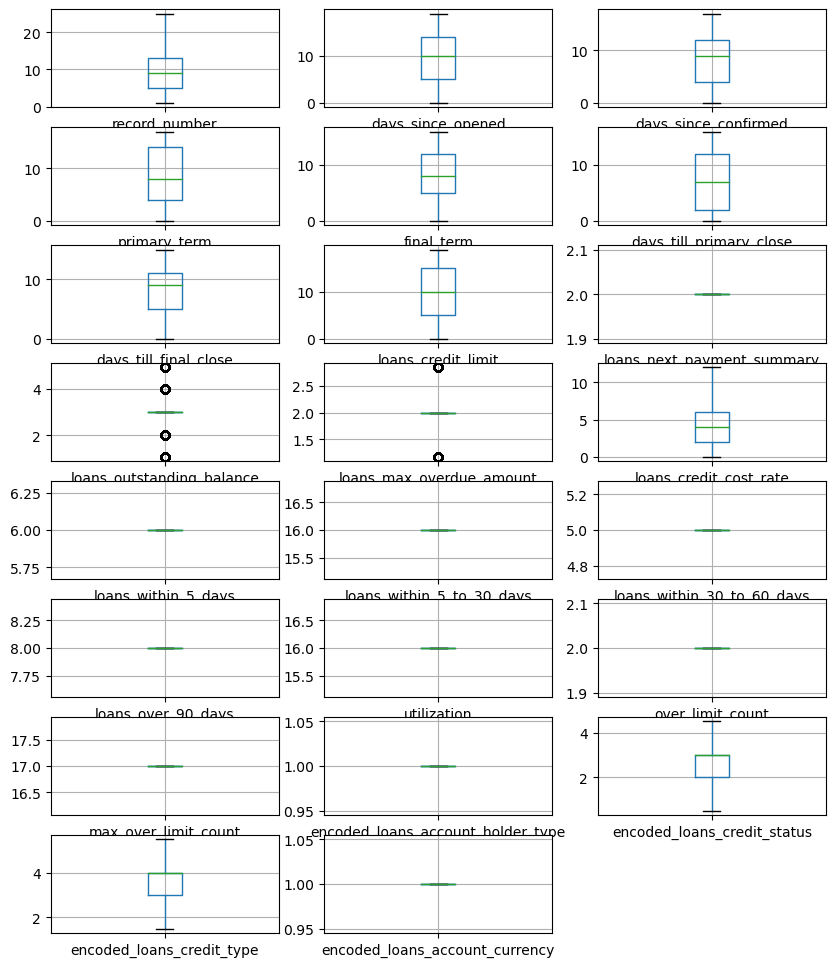

In [34]:
## Ahter Handling Outliers on  Train Data
plt.figure(figsize=(10,12))
i=1
for col in copy2.columns:
    plt.subplot(8,3,i)
    copy2[[col]].boxplot()
    i+=1

In [35]:
copy2.shape

(1106674, 23)

In [36]:
df_unq2.shape

(1106674, 11)

In [37]:
df_merged = pd.concat([copy2, df_unq2], axis=1)
df_merged.shape

(1106674, 34)

Test.csv outlier finding

In [38]:
test_df.nunique()

record_number                         45
days_since_opened                     20
days_since_confirmed                  18
primary_term                          18
final_term                            17
days_till_primary_close               17
days_till_final_close                 16
loans_credit_limit                    20
loans_next_payment_summary             7
loans_outstanding_balance              5
loans_max_overdue_amount               3
loans_credit_cost_rate                14
loans_within_5_days                    9
loans_within_5_to_30_days             15
loans_within_30_to_60_days             7
loans_within_60_to_90_days             2
loans_over_90_days                     6
is_zero_loans_within_5_days            2
is_zero_loans_within_5_to_30_days      2
is_zero_loans_within_30_to_60_days     2
is_zero_loans_within_60_to_90_days     2
is_zero_loans_over_90_days             2
utilization                           20
over_limit_count                      20
max_over_limit_c

In [39]:
unq_count_test = test_df.nunique()

In [40]:
# Separate columns with nunique of 2 and greater than 2
col_unq_2t = unq_count_test[unq_count_test == 2].index.tolist()
col_grt_2t = unq_count_test[unq_count_test > 2].index.tolist()

In [41]:
df_unq2t = test_df[col_unq_2t]
df_unqgrt_2t = test_df[col_grt_2t]

In [42]:
df_unqgrt_2t.shape

(474289, 23)

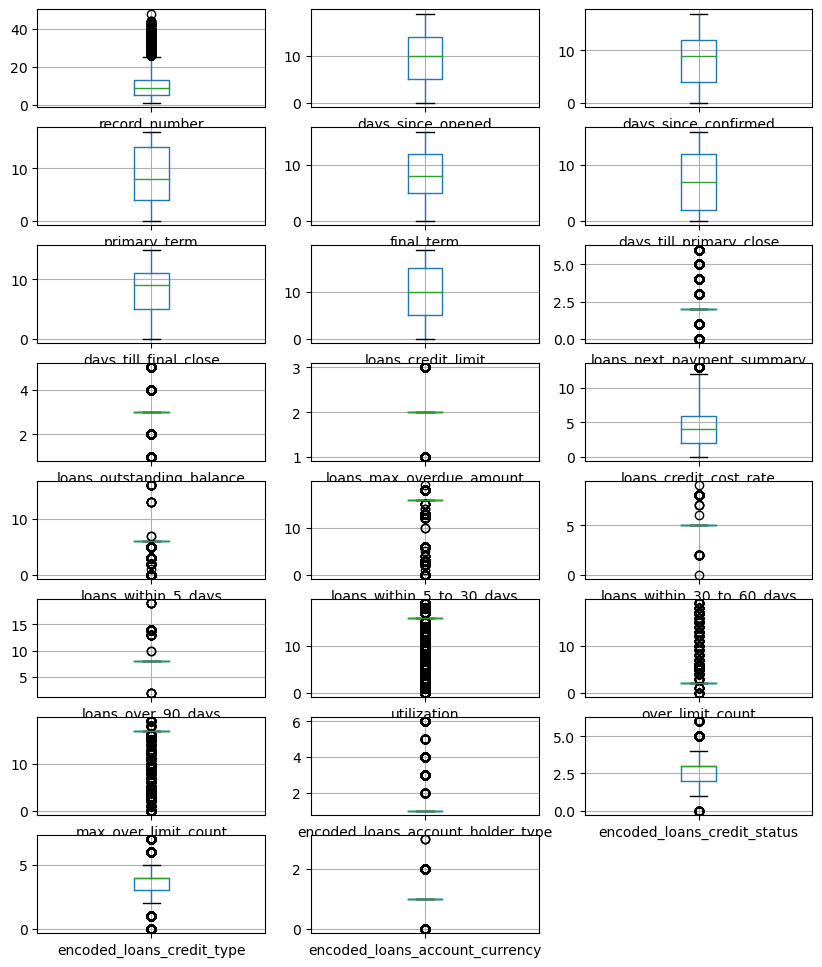

In [43]:
plt.figure(figsize=(10, 12))
i = 1
for col in df_unqgrt_2t.columns:
    plt.subplot(8,3,i)
    df_unqgrt_2t[[col]].boxplot()
    i+=1

In [44]:
df_unqgrt_2t.skew()

record_number                         0.715583
days_since_opened                    -0.028142
days_since_confirmed                  0.117547
primary_term                          0.070395
final_term                           -0.126792
days_till_primary_close               0.181354
days_till_final_close                -0.389569
loans_credit_limit                   -0.082742
loans_next_payment_summary            1.431680
loans_outstanding_balance            -0.079852
loans_max_overdue_amount              0.240961
loans_credit_cost_rate                1.044255
loans_within_5_days                 -13.757970
loans_within_5_to_30_days           -11.885181
loans_within_30_to_60_days           34.950527
loans_over_90_days                   52.507295
utilization                          -1.984014
over_limit_count                      5.911372
max_over_limit_count                 -2.738018
encoded_loans_account_holder_type    10.987692
encoded_loans_credit_status          -0.616715
encoded_loans

In [45]:
copy2t = df_unqgrt_2t.copy()

In [46]:
col_2t = copy2t.columns

In [47]:
## For Train Data
for col in col_2t:
    # Z-Score Method 
    up_limit = copy2t[col].mean() + 3*copy2t[col].std()
    lw_limit = copy2t[col].mean() - 3*copy2t[col].std()
    
    # IQR Method
    q1=copy2t[col].quantile(0.25)
    q3=copy2t[col].quantile(0.75)
    IQR=q3-q1
    up_boundry = q3+1.5*IQR
    lw_boundry = q1-1.5*IQR
    
    if (copy2t[col].skew()<0.5) and (copy2t[col].skew()>-0.5):
        print("Normal Data:",col)
        copy2t[col]=np.where(copy2t[col]>up_limit,up_limit,
                                np.where(copy2t[col]<lw_limit, lw_limit,copy2t[col]))
        
    elif (copy2t[col].skew()>0.5) or (copy2t[col].skew()<-0.5):
        print("Skewed data:",col)
        copy2t[col]=np.where(copy2t[col]>up_boundry,up_boundry,
                                np.where(copy2t[col]<lw_boundry, lw_boundry,copy2t[col]))

Skewed data: record_number
Normal Data: days_since_opened
Normal Data: days_since_confirmed
Normal Data: primary_term
Normal Data: final_term
Normal Data: days_till_primary_close
Normal Data: days_till_final_close
Normal Data: loans_credit_limit
Skewed data: loans_next_payment_summary
Normal Data: loans_outstanding_balance
Normal Data: loans_max_overdue_amount
Skewed data: loans_credit_cost_rate
Skewed data: loans_within_5_days
Skewed data: loans_within_5_to_30_days
Skewed data: loans_within_30_to_60_days
Skewed data: loans_over_90_days
Skewed data: utilization
Skewed data: over_limit_count
Skewed data: max_over_limit_count
Skewed data: encoded_loans_account_holder_type
Skewed data: encoded_loans_credit_status
Skewed data: encoded_loans_credit_type
Skewed data: encoded_loans_account_currency


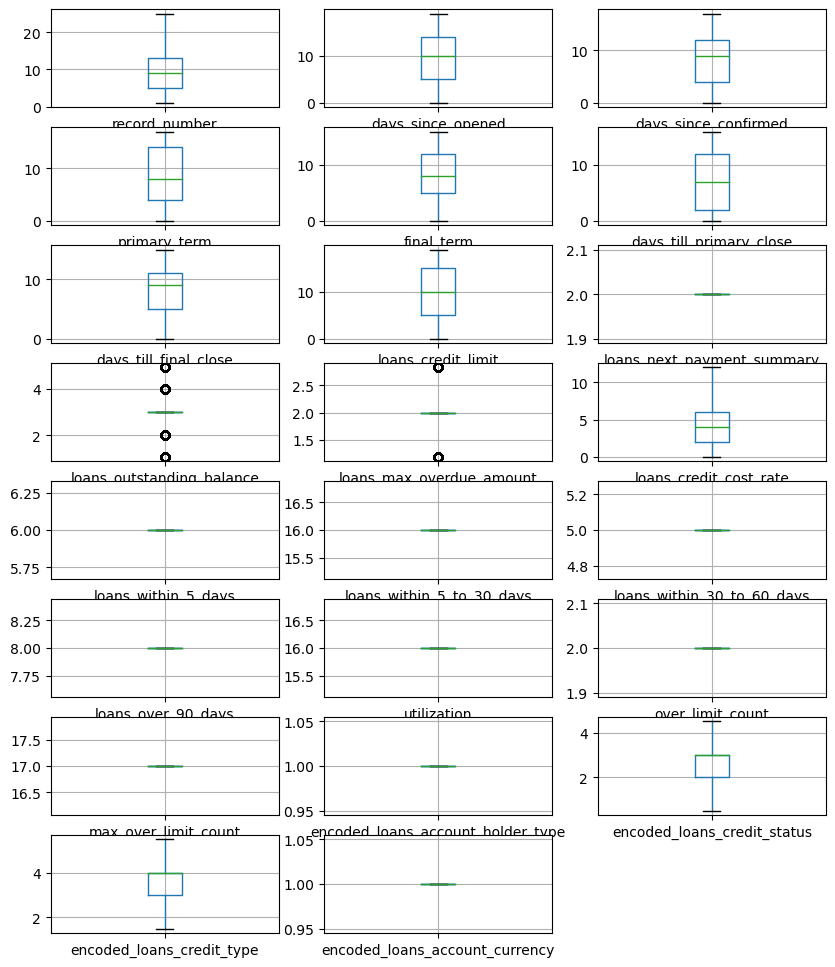

In [48]:
## Ahter Handling Outliers on  Train Data
plt.figure(figsize=(10,12))
i=1
for col in copy2t.columns:
    plt.subplot(8,3,i)
    copy2t[[col]].boxplot()
    i+=1

In [49]:
copy2t.shape

(474289, 23)

In [50]:
df_unq2t.shape

(474289, 9)

In [51]:
df_mergedt = pd.concat([copy2t, df_unq2t], axis=1)
df_mergedt.shape

(474289, 32)

Feature Selection for both columns

In [52]:
x = df_merged.drop(['primary_close_flag', 'final_close_flag'], axis=1)
y = df_merged['primary_close_flag']
z = df_merged['final_close_flag']

In [53]:
from sklearn.feature_selection import SelectKBest, f_regression
fs = SelectKBest(score_func=f_regression, k=8)

Checking Btw X and Y


In [54]:
fs.fit(x, y)

SelectKBest(k=8, score_func=<function f_regression at 0x00000240D233C040>)

In [55]:
fs.get_support().sum()

8

In [56]:
import math
def list_cell(x):
    return[math.ceil(i) for i in x]

In [57]:
print("P_values:")
print(np.round(fs.pvalues_, 4))
print("F Values :")
print(fs.scores_)

P_values:
[0.     0.     0.22   0.     0.     0.     0.     0.     1.     0.
 0.     0.     1.     1.     1.     1.     1.     1.     1.     1.
 0.     0.     1.     0.0276 0.     0.     0.0586 0.     0.     0.
 0.     0.    ]
F Values :
[1.75018986e+03 3.55313836e+02 1.50454856e+00 1.26368341e+05
 9.16760140e+02 3.17589736e+05 1.97012693e+04 6.82572680e+02
 0.00000000e+00 1.36832077e+03 1.31646794e+03 9.91077838e+02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.19227941e+04 7.00387915e+04 0.00000000e+00 4.85595176e+00
 6.37234560e+03 4.61086269e+03 3.57636919e+00 1.38026470e+02
 6.61920097e+02 3.12058899e+04 3.57370037e+04 7.61608100e+04]


In [58]:
list_cell(fs.scores_)

[1751,
 356,
 2,
 126369,
 917,
 317590,
 19702,
 683,
 0,
 1369,
 1317,
 992,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 51923,
 70039,
 0,
 5,
 6373,
 4611,
 4,
 139,
 662,
 31206,
 35738,
 76161]

In [59]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","Score","P_Value"]
print(feature_score.nlargest(8,columns="Score"))

                  Input_Features          Score  P_Value
5        days_till_primary_close  317589.736333      0.0
3                   primary_term  126368.340883      0.0
31  is_zero_max_over_limit_count   76160.810025      0.0
21     encoded_loans_credit_type   70038.791492      0.0
20   encoded_loans_credit_status   51922.794132      0.0
30      is_zero_over_limit_count   35737.003662      0.0
29           is_zero_utilization   31205.889889      0.0
6          days_till_final_close   19701.269268      0.0


Checking Btw X and Z


In [60]:
fs.fit(x, z)

SelectKBest(k=8, score_func=<function f_regression at 0x00000240D233C040>)

In [61]:
import math
def list_cell(x):
    return[math.ceil(i) for i in x]

In [62]:
print("P_values:")
print(np.round(fs.pvalues_, 4))
print("F Values :")
print(fs.scores_)

P_values:
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e-04 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 0.000e+00
 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.336e-01
 3.100e-03 0.000e+00 0.000e+00 0.000e+00]
F Values :
[5.12399905e+04 6.01875945e+02 1.53232173e+03 4.34144118e+04
 1.00342402e+03 3.87462695e+04 1.22309812e+05 1.46657482e+01
 0.00000000e+00 4.29257595e+02 2.27337709e+01 2.21930128e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.30699614e+05 5.45895628e+04 0.00000000e+00 2.24309947e+01
 6.88747496e+03 4.31944981e+03 1.78294717e+01 1.41887720e+00
 8.73268210e+00 3.06722642e+05 1.88854046e+04 1.03981757e+04]


In [63]:
list_cell(fs.scores_)

[51240,
 602,
 1533,
 43415,
 1004,
 38747,
 122310,
 15,
 0,
 430,
 23,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 630700,
 54590,
 0,
 23,
 6888,
 4320,
 18,
 2,
 9,
 306723,
 18886,
 10399]

In [64]:
features_score = pd.DataFrame(fs.scores_)
features_pvalue = pd.DataFrame(np.round(fs.pvalues_,4))
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","Score","P_Value"]
print(feature_score.nlargest(8,columns="Score"))

                 Input_Features          Score  P_Value
20  encoded_loans_credit_status  630699.614126      0.0
29          is_zero_utilization  306722.642309      0.0
6         days_till_final_close  122309.811848      0.0
21    encoded_loans_credit_type   54589.562819      0.0
0                 record_number   51239.990460      0.0
3                  primary_term   43414.411768      0.0
5       days_till_primary_close   38746.269468      0.0
30     is_zero_over_limit_count   18885.404561      0.0


Primary Closed flag

In [65]:
X =df_merged[['days_till_primary_close', 'primary_term', 'is_zero_max_over_limit_count', 'encoded_loans_credit_type', 'encoded_loans_credit_status']]
Y = df_merged['primary_close_flag']


In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(774671, 5)
(332003, 5)
(774671,)
(332003,)


Scale up the data

In [67]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [68]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [69]:
## Scale the data
x_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [70]:
df_merged_test = df_mergedt[['days_till_primary_close', 'primary_term', 'is_zero_max_over_limit_count', 'encoded_loans_credit_type', 'encoded_loans_credit_status']]

In [71]:
scaled_data = scaler.fit_transform(df_merged_test)

In [72]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

#LogisticRegression

In [73]:
lg_model = LogisticRegression()
lg_model.fit(x_train_scaled, Y_train)

y_pred = lg_model.predict(x_test_scaled)
print("-----Model Evaluation on Test Data -----")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_test,y_pred))
print()
print('Classification Report:\n',classification_report(Y_test,y_pred))

y_pred_train=lg_model.predict(x_train_scaled)
print("----------------------------------------------------------------------")
print("-----Model Evaluation on Train Data -----")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(Y_train,y_pred_train))

print(f"Accuracy on Test Data: {accuracy_score(Y_test,y_pred)*100:.2f} %")
print(f"Accuracy on Train Data: {accuracy_score(Y_train,y_pred_train)*100:.2f} %")


-----Model Evaluation on Test Data -----

Confusion Matrix:
 [[272143  17545]
 [ 13422  28893]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95    289688
           1       0.62      0.68      0.65     42315

    accuracy                           0.91    332003
   macro avg       0.79      0.81      0.80    332003
weighted avg       0.91      0.91      0.91    332003

----------------------------------------------------------------------
-----Model Evaluation on Train Data -----

Confusion Matrix:
 [[634225  40807]
 [ 31455  68184]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95    675032
           1       0.63      0.68      0.65     99639

    accuracy                           0.91    774671
   macro avg       0.79      0.81      0.80    774671
weighted avg       0.91      0.91      0.91    774671

Accuracy on Test Data: 90.67 %
A

In [74]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [75]:
Y_test[:10]

342199     0
1068156    0
1104571    0
163659     0
699511     1
780546     0
353964     0
333184     0
576704     0
926314     0
Name: primary_close_flag, dtype: int64

#RandomForestClassifier

In [95]:
Rfc_model = RandomForestClassifier()
Rfc_model.fit(x_train_scaled, Y_train)

y_pred = Rfc_model.predict(x_test_scaled)
print("-----Model Evaluation on Test Data -----")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_test,y_pred))
print()
print('Classification Report:\n',classification_report(Y_test,y_pred))

y_pred_train=Rfc_model.predict(x_train_scaled)
print("----------------------------------------------------------------------")
print("-----Model Evaluation on Train Data -----")
print()
print('Confusion Matrix:\n',confusion_matrix(Y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(Y_train,y_pred_train))

print(f"Accuracy on Test Data: {accuracy_score(Y_test,y_pred)*100:.2f} %")
print(f"Accuracy on Train Data: {accuracy_score(Y_train,y_pred_train)*100:.2f} %")

-----Model Evaluation on Test Data -----

Confusion Matrix:
 [[289627     61]
 [    32  42283]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    289688
           1       1.00      1.00      1.00     42315

    accuracy                           1.00    332003
   macro avg       1.00      1.00      1.00    332003
weighted avg       1.00      1.00      1.00    332003

----------------------------------------------------------------------
-----Model Evaluation on Train Data -----

Confusion Matrix:
 [[674879    153]
 [    82  99557]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    675032
           1       1.00      1.00      1.00     99639

    accuracy                           1.00    774671
   macro avg       1.00      1.00      1.00    774671
weighted avg       1.00      1.00      1.00    774671

Accuracy on Test Data: 99.97 %
A

In [ ]:
prediction = lg_model.predict(df_merged_test)
prediction

#final_close_flag

In [ ]:
df_merged.columns

In [ ]:
X1 = df_merged[['encoded_loans_credit_status', 'is_zero_utilization', 'days_till_final_close', 'encoded_loans_credit_type', 'record_number']]
Y1 = df_merged['final_close_flag']

In [ ]:
df_mergedf = df_mergedt[['encoded_loans_credit_status', 'is_zero_utilization', 'days_till_final_close', 'encoded_loans_credit_type', 'record_number']]

In [ ]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.30)
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

In [ ]:
X1_train.columns

In [ ]:
scaler = StandardScaler()
scaler.fit(X1_train)

In [ ]:
## Scale the data
x1_train_scaled = pd.DataFrame(scaler.transform(X1_train), columns=X1_train.columns)
x1_test_scaled = pd.DataFrame(scaler.transform(X1_test), columns=X1_test.columns)

In [ ]:
scaled_data = scaler.fit_transform(df_mergedf)

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(x1_train_scaled, Y1_train)

y1_pred = lg_model.predict(x1_test_scaled)
print("-----Model Evaluation on Test Data -----")
print()
print('Confusion Matrix:\n',confusion_matrix(Y1_test,y1_pred))
print()
print('Classification Report:\n',classification_report(Y1_test,y1_pred))

y1_pred_train=lg_model.predict(x1_train_scaled)
print("----------------------------------------------------------------------")
print("-----Model Evaluation on Train Data -----")
print()
print('Confusion Matrix:\n',confusion_matrix(Y1_train,y1_pred_train))
print()
print('Classification Report:\n',classification_report(Y1_train,y1_pred_train))

print(f"Accuracy on Test Data: {accuracy_score(Y1_test,y_pred)*100:.2f} %")
print(f"Accuracy on Train Data: {accuracy_score(Y1_train,y1_pred_train)*100:.2f} %")


In [ ]:
y1_pred[:10]

In [ ]:
Y1_test[:10]

In [ ]:
Rfc_model = RandomForestClassifier()
Rfc_model.fit(x1_train_scaled, Y1_train)

y1_pred = Rfc_model.predict(x1_test_scaled)
print("-----Model Evaluation on Test Data -----")
print()
print('Confusion Matrix:\n',confusion_matrix(Y1_test,y1_pred))
print()
print('Classification Report:\n',classification_report(Y1_test,y1_pred))

y1_pred_train=Rfc_model.predict(x1_train_scaled)
print("----------------------------------------------------------------------")
print("-----Model Evaluation on Train Data -----")
print()
print('Confusion Matrix:\n',confusion_matrix(Y1_train,y1_pred_train))
print()
print('Classification Report:\n',classification_report(Y1_train,y1_pred_train))

print(f"Accuracy on Test Data: {accuracy_score(Y1_test,y1_pred)*100:.2f} %")
print(f"Accuracy on Train Data: {accuracy_score(Y1_train,y1_pred_train)*100:.2f} %")

In [ ]:
prediction1 = lg_model.predict(df_mergedf)
prediction1

In [ ]:
submission_file = pd.DataFrame()
submission_file['primary_close_flag'] = prediction
submission_file['final_close_flag'] = prediction1


In [ ]:
submission_file

In [ ]:
submission_file.to_csv("submission.csv",index_label=False)

In [ ]:
pd.read_csv('submission.csv')